In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'
from bs4 import BeautifulSoup
import requests

C:\Users\user\AppData\Local\Temp/ipykernel_11140/1982119812.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [158]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
 
wd = webdriver.Chrome('../data/chromedriver.exe')

In [ ]:
from selenium import webdriver
from pandas.io.html import read_html
import time
import pandas as pd
import numpy as np

def defensive (url, sleep_time) :
    #open webdriver
    driver = webdriver.Chrome('../data/chromedriver.exe')
    driver.get(url)
    
    #click 'accept' button
    time.sleep(sleep_time)
#     accept = driver.find_element_by_css_selector('#qcCmpButtons > button:nth-child(2)')
#     accept.click()
    
    #click 'defensive' button
    time.sleep(sleep_time)
    defense = driver.find_element_by_link_text('Defensive')
    defense.click()
    
    #click 'all players' button
    time.sleep(sleep_time)
    all_player = driver.find_element_by_link_text('All players')
    all_player.click()
    
    #get the total page number
    time.sleep(sleep_time)
    page = driver.find_element_by_link_text('last')
    total_page = int(page.get_attribute('data-page'))
    
    #create the dataframe
    df_defensive = pd.DataFrame(columns = ['Player', 'Player.1', 'Apps', 'Mins', 'Tackles', 'Inter', 'Fouls',
       'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'Rating'])
    
    #crawling the table
    for i in np.arange(total_page) :
        time.sleep(sleep_time)
        table = driver.find_element_by_xpath('//*[@id="statistics-table-defensive"]')
        table_html= table.get_attribute('innerHTML')
        df2 = read_html(table_html)[0]
        df_defensive = pd.concat([df_defensive, df2], axis=0)
        driver.find_element_by_link_text('next').click()
        
    return(df_defensive)

url = 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/Seasons/8228/Stages/18685/PlayerStatistics/England-Premier-League-2020-2021'
df = defensive(url, 5)

In [ ]:
print(df.shape)

In [ ]:
df = df.reset_index()
df.drop(['index','Player'] , axis=1, inplace=True)
spl = df['Player.1'].str.split(',')
name = []
for i in range(len(spl)):
    a = spl[i][0]
    name.append(a)
df['name']= name
age = []
for i in range(len(spl)):
    a = int(spl[i][1])
    age.append(a)
df['age'] = age
position1 = []
for i in range(len(spl)):
    a = spl[i][2]
    position1.append(a)
df['position1']=position1
position2 = []
for i in range(len(spl)):
    if len(spl[i]) > 3 :
        a = spl[i][3]
    else : a = np.nan
    position2.append(a)
df['position2'] = position2
df.drop('Player.1', axis =1, inplace=True)

In [ ]:
df_defense = df.iloc[:,[11,12,13,14,0,1,2,3,4,5,6,7,8,9,10]]

In [ ]:
df_defense

In [ ]:
df_defense = df_defense.reset_index()

In [ ]:
df_defense.rename(columns={'index':'Rating_rank'},inplace=True)

In [ ]:
df_defense['Rating_rank']=df_defense['Rating_rank']+1

In [ ]:
df_defense

In [47]:
def soccer_team(x):
    if 'Arsenal' in x:
        return 'Arsenal'
    elif 'Aston Villa' in x:
        return 'Aston Villa'
    elif 'Burnley' in x:
        return 'Burnley'
    elif 'Bournemouth' in x:
        return 'Bournemouth'
    elif 'Brighton' in x:
        return 'Brighton'
    elif 'Chelsea' in x:
        return 'Chelsea'
    elif 'Crystal Palace' in x:
        return 'Crystal Palace'
    elif 'Everton' in x :
        return 'Everton'
    elif 'Leicester' in x:
        return 'Leicester'
    elif 'Liverpool' in x:
        return 'Liverpool'
    elif 'Man Utd' in x:
        return 'Man Utd'
    elif 'Man City' in x:
        return 'Man City'
    elif 'Newcastle' in x:
        return 'Newcastle'
    elif 'Norwich' in x:
        return 'Norwich'
    elif 'Southampton' in x:
        return 'Southampton'
    elif 'Sheff Utd' in x:
        return 'Sheff Utd'
    elif 'Tottenham' in x:
        return 'Tottenham'
    elif 'Watford' in x:
        return 'Watford'
    elif 'West Ham' in x:
        return 'West Ham'
    elif 'Wolves' in x:
        return 'Wolves'
    elif 'Leeds' in x:
        return 'Leeds'
    elif 'Fulham' in x:
        return 'Fulham'
    elif 'West Brom' in x:
        return 'West Brom'
    else:
        return x

In [48]:
df_defense['team']=df_defense['name'].apply(soccer_team)

In [49]:
def clean(new_id):
    for i in ['Arsenal','Aston Villa','Burnley','Brighton','Chelsea','Bournemouth', 'Crystal Palace','Everton', 'Leicester','Liverpool','Man Utd','Man City','Newcastle','Norwich',
'Southampton','Sheff Utd','Tottenham','Watford', 'West Ham','Wolves','Leeds','West Brom','Fulham'] :
        new_id = new_id.replace(i, "")
    return new_id

In [50]:
df_defense['name']=df_defense['name'].apply(clean)

In [51]:
df_defense

,Rating_rank,name,age,position1,position2,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,team
0,1,Harry Kane,28,AM(C),FW,35,3087,0.6,0.3,0.7,-,1.1,0.5,0.3,-,7.79,Tottenham
1,2,Kevin De Bruyne,30,M(CLR),FW,23(2),2001,1.4,0.4,1.1,-,0.3,1.4,-,-,7.65,Man City
2,3,Jack Grealish,26,AM(CL),FW,24(2),2184,1.2,0.5,1.5,-,0.2,0.3,0.1,-,7.56,Aston Villa
3,4,Bruno Fernandes,27,M(CLR),NaN,35(2),3110,1.5,0.7,1.2,-,0.7,2.0,-,-,7.43,Man Utd
4,5,Tomas Soucek,26,DMC,NaN,38,3420,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,7.36,West Ham
5,6,Mason Mount,23,M(CLR),NaN,32(4),2892,2.1,0.9,1.4,-,0.3,1.2,0.1,-,7.33,Chelsea
6,7,Sadio Mané,29,AM(CLR),FW,31(4),2813,1.4,0.4,1.5,-,0.3,0.6,-,-,7.33,Liverpool
7,8,Riyad Mahrez,30,AM(CLR),FW,23(4),1955,0.7,0.3,0.5,-,0.1,0.9,-,-,7.31,Man City
8,9,João Cancelo,27,D(LR),M(R),27(1),2302,2.4,1.5,1.3,0.3,1.0,1.4,0.1,-,7.31,Man City
9,10,Gareth Bale,32,M(CLR),FW,10(10),923,0.9,0.4,0.5,0.1,0.7,0.4,0.1,-,7.30,Tottenham


In [30]:
df_defense.columns.nunique()

17

In [52]:
df_defense =df_defense.iloc[:,[1,16,2,3,4,5,6,7,8,9,10,11,12,13,14,0,15]]

In [53]:
df_defense

,name,team,age,position1,position2,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating_rank,Rating
0,Harry Kane,Tottenham,28,AM(C),FW,35,3087,0.6,0.3,0.7,-,1.1,0.5,0.3,-,1,7.79
1,Kevin De Bruyne,Man City,30,M(CLR),FW,23(2),2001,1.4,0.4,1.1,-,0.3,1.4,-,-,2,7.65
2,Jack Grealish,Aston Villa,26,AM(CL),FW,24(2),2184,1.2,0.5,1.5,-,0.2,0.3,0.1,-,3,7.56
3,Bruno Fernandes,Man Utd,27,M(CLR),NaN,35(2),3110,1.5,0.7,1.2,-,0.7,2.0,-,-,4,7.43
4,Tomas Soucek,West Ham,26,DMC,NaN,38,3420,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,5,7.36
5,Mason Mount,Chelsea,23,M(CLR),NaN,32(4),2892,2.1,0.9,1.4,-,0.3,1.2,0.1,-,6,7.33
6,Sadio Mané,Liverpool,29,AM(CLR),FW,31(4),2813,1.4,0.4,1.5,-,0.3,0.6,-,-,7,7.33
7,Riyad Mahrez,Man City,30,AM(CLR),FW,23(4),1955,0.7,0.3,0.5,-,0.1,0.9,-,-,8,7.31
8,João Cancelo,Man City,27,D(LR),M(R),27(1),2302,2.4,1.5,1.3,0.3,1.0,1.4,0.1,-,9,7.31
9,Gareth Bale,Tottenham,32,M(CLR),FW,10(10),923,0.9,0.4,0.5,0.1,0.7,0.4,0.1,-,10,7.30


In [54]:
df_defense.isnull().sum()

name             0
team             0
age              0
position1        0
position2      312
Apps             0
Mins             0
Tackles          0
Inter            0
Fouls            0
Offsides         0
Clear            0
Drb              0
Blocks           0
OwnG             0
Rating_rank      0
Rating           0
dtype: int64

In [55]:
def offensive (url, sleep_time) :
    #open webdriver
    driver = webdriver.Chrome('../data/chromedriver.exe')
    driver.get(url)
    
    #click 'accept' button
    time.sleep(sleep_time)
#     accept = driver.find_element_by_css_selector('#qcCmpButtons > button:nth-child(2)')
#     accept.click()
    
    #click 'Offensive' button
    time.sleep(sleep_time)
    offense = driver.find_element_by_link_text('Offensive')
    offense.click()
    
    #click 'all players' button
    time.sleep(sleep_time)
    all_player = driver.find_element_by_link_text('All players')
    all_player.click()
    
    #get the total page number
    time.sleep(sleep_time)
    page = driver.find_element_by_link_text('last')
    total_page = int(page.get_attribute('data-page'))
    
    #create the dataframe
    df_offensive = pd.DataFrame(columns = ['Player', 'Player.1', 'Apps', 'Mins','Goals', 'Assists', 'SpG', 'KeyP','Drb',
       'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating'])
    
    #crawling the table
    for i in np.arange(total_page) :
        time.sleep(sleep_time)
        table = driver.find_element_by_xpath('//*[@id="statistics-table-offensive"]')
        table_html= table.get_attribute('innerHTML')
        df2 = read_html(table_html)[0]
        df_offensive = pd.concat([df_offensive, df2], axis=0)
        driver.find_element_by_link_text('next').click()
        
    return(df_offensive)

url = 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/Seasons/8228/Stages/18685/PlayerStatistics/England-Premier-League-2020-2021'
df = offensive(url, 5)

In [56]:
df = df.reset_index()
df.drop(['index','Player'] , axis=1, inplace=True)
spl = df['Player.1'].str.split(',')
name = []
for i in range(len(spl)):
    a = spl[i][0]
    name.append(a)
df['name']= name
age = []
for i in range(len(spl)):
    a = int(spl[i][1])
    age.append(a)
df['age'] = age
position1 = []
for i in range(len(spl)):
    a = spl[i][2]
    position1.append(a)
df['position1']=position1
position2 = []
for i in range(len(spl)):
    if len(spl[i]) > 3 :
        a = spl[i][3]
    else : a = np.nan
    position2.append(a)
df['position2'] = position2
df.drop('Player.1', axis =1, inplace=True)
df_offense = df.iloc[:,[12,13,14,0,1,2,3,4,5,6,7,8,9,10,11]]

In [57]:
df_offense

,name,age,position1,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane Tottenham,28,AM(C),35,3087,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne Man City,30,M(CLR),23(2),2001,6,12,3.2,3.2,1.9,1.2,-,1.3,1.8,7.65
2,Jack Grealish Aston Villa,26,AM(CL),24(2),2184,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes Man Utd,27,M(CLR),35(2),3110,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek West Ham,26,DMC,38,3420,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36
5,Mason Mount Chelsea,23,M(CLR),32(4),2892,6,5,2.3,2.4,1.2,1.2,0.1,1.1,1.6,7.33
6,Sadio Mané Liverpool,29,AM(CLR),31(4),2813,11,7,2.7,1.7,2.3,2.2,0.9,1.7,2.9,7.33
7,Riyad Mahrez Man City,30,AM(CLR),23(4),1955,9,6,2.1,1.6,1.7,1.1,0.3,1.1,1.7,7.31
8,João Cancelo Man City,27,D(LR),27(1),2302,2,3,1.3,1.6,1.7,0.6,0.1,0.8,1.3,7.31
9,Gareth Bale Tottenham,32,M(CLR),10(10),923,11,2,1.9,1.1,1.4,0.5,0.3,0.4,0.9,7.30


In [58]:
df_offense['name']=df_offense['name'].apply(clean)

In [61]:
df_defense.columns

Index(['name', 'team', 'age', 'position1', 'position2', 'Apps', 'Mins',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks',
       'OwnG', 'Rating_rank', 'Rating'],
      dtype='object')

In [60]:
df_offense.columns

Index(['name', 'age', 'position1', 'Apps', 'Mins', 'Goals', 'Assists', 'SpG',
       'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating'],
      dtype='object')

In [63]:
df_offense.drop(columns=['age', 'position1', 'Apps', 'Mins','Rating'],inplace=True)

In [64]:
df_defense=df_defense.merge(df_offense,on='name',how='left')

In [67]:
df_defense.shape

(548, 26)

In [70]:
df_defense.head()

,name,team,age,position1,position2,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb_x,Blocks,OwnG,Rating_rank,Rating,Goals,Assists,SpG,KeyP,Drb_y,Fouled,Off,Disp,UnsTch
0,Harry Kane,Tottenham,28,AM(C),FW,35,3087,0.6,0.3,0.7,-,1.1,0.5,0.3,-,1,7.79,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8
1,Kevin De Bruyne,Man City,30,M(CLR),FW,23(2),2001,1.4,0.4,1.1,-,0.3,1.4,-,-,2,7.65,6,12,3.2,3.2,1.9,1.2,-,1.3,1.8
2,Jack Grealish,Aston Villa,26,AM(CL),FW,24(2),2184,1.2,0.5,1.5,-,0.2,0.3,0.1,-,3,7.56,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1
3,Bruno Fernandes,Man Utd,27,M(CLR),NaN,35(2),3110,1.5,0.7,1.2,-,0.7,2.0,-,-,4,7.43,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5
4,Tomas Soucek,West Ham,26,DMC,NaN,38,3420,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,5,7.36,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1


In [68]:
def summary(url, sleep_time) :
    #open webdriver
    driver = webdriver.Chrome('../data/chromedriver.exe')
    driver.get(url)
    
    #click 'accept' button
    time.sleep(sleep_time)
#     accept = driver.find_element_by_css_selector('#qcCmpButtons > button:nth-child(2)')
#     accept.click()
    
    #click 'all players' button
    time.sleep(sleep_time)
    all_player = driver.find_element_by_link_text('All players')
    all_player.click()
    
    #get the total page number
    time.sleep(sleep_time)
    page = driver.find_element_by_link_text('last')
    total_page = int(page.get_attribute('data-page'))
    
    #create the dataframe
    df_summary = pd.DataFrame(columns = ['Player', 'Player.1', 'Apps', 'Mins', 'Goals', 'Assists', 'Yel', 'Red','SpG',
       'PS%', 'AerialsWon', 'MotM', 'Rating'])
    
    #crawling the table
    for i in np.arange(total_page) :
        time.sleep(sleep_time)
        table = driver.find_element_by_xpath('//*[@id="statistics-table-summary"]')
        table_html= table.get_attribute('innerHTML')
        df2 = read_html(table_html)[0]
        df_summary = pd.concat([df_summary, df2], axis=0)
        driver.find_element_by_link_text('next').click()
        
    return(df_summary)

url = 'https://1xbet.whoscored.com/Regions/252/Tournaments/2/Seasons/8228/Stages/18685/PlayerStatistics/England-Premier-League-2020-2021'
df = summary(url, 5)

In [71]:
df = df.reset_index()
df.drop(['index','Player'] , axis=1, inplace=True)
spl = df['Player.1'].str.split(',')
name = []
for i in range(len(spl)):
    a = spl[i][0]
    name.append(a)
df['name']= name
age = []
for i in range(len(spl)):
    a = int(spl[i][1])
    age.append(a)
df['age'] = age
position1 = []
for i in range(len(spl)):
    a = spl[i][2]
    position1.append(a)
df['position1']=position1
position2 = []
for i in range(len(spl)):
    if len(spl[i]) > 3 :
        a = spl[i][3]
    else : a = np.nan
    position2.append(a)
df['position2'] = position2
df.drop('Player.1', axis =1, inplace=True)

In [75]:
df.head()

,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Rating,name,age,position1,position2
0,35,3087,23,14,1,-,3.9,69.9,2.2,13,7.79,Harry Kane Tottenham,28,AM(C),FW
1,23(2),2001,6,12,1,-,3.2,81.7,0.2,8,7.65,Kevin De Bruyne Man City,30,M(CLR),FW
2,24(2),2184,6,10,6,-,1.9,83.3,1.0,4,7.56,Jack Grealish Aston Villa,26,AM(CL),FW
3,35(2),3110,18,12,6,-,3.3,78.3,0.4,6,7.43,Bruno Fernandes Man Utd,27,M(CLR),NaN
4,38,3420,10,1,7,1,1.7,75.5,6.2,6,7.36,Tomas Soucek West Ham,26,DMC,NaN


In [76]:
df.columns.nunique()

15

In [82]:
df_summary = df.iloc[:,[11,4,5,7,8,9,10]]

In [84]:
df_defense.drop(columns=['Rating'],inplace=True)

In [87]:
df_summary['name'] = df_summary['name'].apply(clean)

In [88]:
df_summary

,name,Yel,Red,PS%,AerialsWon,MotM,Rating
0,Harry Kane,1,-,69.9,2.2,13,7.79
1,Kevin De Bruyne,1,-,81.7,0.2,8,7.65
2,Jack Grealish,6,-,83.3,1.0,4,7.56
3,Bruno Fernandes,6,-,78.3,0.4,6,7.43
4,Tomas Soucek,7,1,75.5,6.2,6,7.36
5,Mason Mount,2,-,86.5,0.6,4,7.33
6,Sadio Mané,3,-,78.7,1.0,7,7.33
7,Riyad Mahrez,-,-,88.4,0.6,4,7.31
8,João Cancelo,5,1,87.1,1.1,2,7.31
9,Gareth Bale,1,-,73.2,1.2,4,7.30


In [109]:
df_Stat = df_defense.merge(df_summary,on='name',how='left')

In [110]:
df_Stat.drop_duplicates(subset='name',inplace=True)

In [111]:
df_Stat.shape

(524, 31)

In [112]:
df_Stat.rename(columns={'Drb_x':'Drb_past','Drb_y':'Drb_Succ'},inplace=True)

In [113]:
df_Stat.reset_index(drop=True,inplace=True)

In [114]:
df_Stat

,name,team,age,position1,position2,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb_past,Blocks,OwnG,Rating_rank,Goals,Assists,SpG,KeyP,Drb_Succ,Fouled,Off,Disp,UnsTch,Yel,Red,PS%,AerialsWon,MotM,Rating
0,Harry Kane,Tottenham,28,AM(C),FW,35,3087,0.6,0.3,0.7,-,1.1,0.5,0.3,-,1,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,1,-,69.9,2.2,13,7.79
1,Kevin De Bruyne,Man City,30,M(CLR),FW,23(2),2001,1.4,0.4,1.1,-,0.3,1.4,-,-,2,6,12,3.2,3.2,1.9,1.2,-,1.3,1.8,1,-,81.7,0.2,8,7.65
2,Jack Grealish,Aston Villa,26,AM(CL),FW,24(2),2184,1.2,0.5,1.5,-,0.2,0.3,0.1,-,3,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,6,-,83.3,1.0,4,7.56
3,Bruno Fernandes,Man Utd,27,M(CLR),NaN,35(2),3110,1.5,0.7,1.2,-,0.7,2.0,-,-,4,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5,6,-,78.3,0.4,6,7.43
4,Tomas Soucek,West Ham,26,DMC,NaN,38,3420,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,5,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7,1,75.5,6.2,6,7.36
5,Mason Mount,Chelsea,23,M(CLR),NaN,32(4),2892,2.1,0.9,1.4,-,0.3,1.2,0.1,-,6,6,5,2.3,2.4,1.2,1.2,0.1,1.1,1.6,2,-,86.5,0.6,4,7.33
6,Sadio Mané,Liverpool,29,AM(CLR),FW,31(4),2813,1.4,0.4,1.5,-,0.3,0.6,-,-,7,11,7,2.7,1.7,2.3,2.2,0.9,1.7,2.9,3,-,78.7,1.0,7,7.33
7,Riyad Mahrez,Man City,30,AM(CLR),FW,23(4),1955,0.7,0.3,0.5,-,0.1,0.9,-,-,8,9,6,2.1,1.6,1.7,1.1,0.3,1.1,1.7,-,-,88.4,0.6,4,7.31
8,João Cancelo,Man City,27,D(LR),M(R),27(1),2302,2.4,1.5,1.3,0.3,1.0,1.4,0.1,-,9,2,3,1.3,1.6,1.7,0.6,0.1,0.8,1.3,5,1,87.1,1.1,2,7.31
9,Gareth Bale,Tottenham,32,M(CLR),FW,10(10),923,0.9,0.4,0.5,0.1,0.7,0.4,0.1,-,10,11,2,1.9,1.1,1.4,0.5,0.3,0.4,0.9,1,-,73.2,1.2,4,7.30


In [115]:
df_Stat.rename(columns={'name':'Name','team':'Team'},inplace=True)

In [116]:
def tag_replace(new_id):
    for i in ['-'] :
        new_id = new_id.replace(i, 0.0)
    return new_id
    

In [117]:
df_Stat=df_Stat.apply(tag_replace)

In [118]:
df_Stat

,Name,Team,age,position1,position2,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb_past,Blocks,OwnG,Rating_rank,Goals,Assists,SpG,KeyP,Drb_Succ,Fouled,Off,Disp,UnsTch,Yel,Red,PS%,AerialsWon,MotM,Rating
0,Harry Kane,Tottenham,28,AM(C),FW,35,3087,0.6,0.3,0.7,0.0,1.1,0.5,0.3,0.0,1,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,1,0.0,69.9,2.2,13,7.79
1,Kevin De Bruyne,Man City,30,M(CLR),FW,23(2),2001,1.4,0.4,1.1,0.0,0.3,1.4,0.0,0.0,2,6,12,3.2,3.2,1.9,1.2,0.0,1.3,1.8,1,0.0,81.7,0.2,8,7.65
2,Jack Grealish,Aston Villa,26,AM(CL),FW,24(2),2184,1.2,0.5,1.5,0.0,0.2,0.3,0.1,0.0,3,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,6,0.0,83.3,1.0,4,7.56
3,Bruno Fernandes,Man Utd,27,M(CLR),NaN,35(2),3110,1.5,0.7,1.2,0.0,0.7,2.0,0.0,0.0,4,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5,6,0.0,78.3,0.4,6,7.43
4,Tomas Soucek,West Ham,26,DMC,NaN,38,3420,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,5,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7,1,75.5,6.2,6,7.36
5,Mason Mount,Chelsea,23,M(CLR),NaN,32(4),2892,2.1,0.9,1.4,0.0,0.3,1.2,0.1,0.0,6,6,5,2.3,2.4,1.2,1.2,0.1,1.1,1.6,2,0.0,86.5,0.6,4,7.33
6,Sadio Mané,Liverpool,29,AM(CLR),FW,31(4),2813,1.4,0.4,1.5,0.0,0.3,0.6,0.0,0.0,7,11,7,2.7,1.7,2.3,2.2,0.9,1.7,2.9,3,0.0,78.7,1.0,7,7.33
7,Riyad Mahrez,Man City,30,AM(CLR),FW,23(4),1955,0.7,0.3,0.5,0.0,0.1,0.9,0.0,0.0,8,9,6,2.1,1.6,1.7,1.1,0.3,1.1,1.7,0.0,0.0,88.4,0.6,4,7.31
8,João Cancelo,Man City,27,D(LR),M(R),27(1),2302,2.4,1.5,1.3,0.3,1.0,1.4,0.1,0.0,9,2,3,1.3,1.6,1.7,0.6,0.1,0.8,1.3,5,1,87.1,1.1,2,7.31
9,Gareth Bale,Tottenham,32,M(CLR),FW,10(10),923,0.9,0.4,0.5,0.1,0.7,0.4,0.1,0.0,10,11,2,1.9,1.1,1.4,0.5,0.3,0.4,0.9,1,0.0,73.2,1.2,4,7.30


In [2]:
train = pd.read_csv('../data/housing/train.csv')
test = pd.read_csv('../data/housing/test.csv')

In [7]:
for df in [train,test]:
    print(df.isnull().sum())

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64
id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64


In [8]:
train.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [9]:
test.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.237037,1524.071111,1.871852,499.867407,1101.222222,1175.714815,1.597778,1973.537778,1985.258519,1978.457037
std,389.855743,1.370057,514.410852,0.651639,186.267579,431.641042,406.858231,0.549002,29.799448,20.818442,25.771750
min,1.000000,2.000000,407.000000,1.000000,160.000000,173.000000,407.000000,0.000000,1879.000000,1950.000000,1895.000000
25%,338.250000,5.000000,1169.750000,1.000000,365.250000,825.250000,887.250000,1.000000,1956.000000,1966.000000,1961.000000
50%,675.500000,6.000000,1472.500000,2.000000,484.000000,1024.000000,1098.000000,2.000000,1976.000000,1995.000000,1982.000000
75%,1012.750000,7.000000,1742.250000,2.000000,578.750000,1338.750000,1409.500000,2.000000,2002.000000,2004.000000,2002.000000
max,1350.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,5095.000000,4.000000,2010.000000,2010.000000,2010.000000


In [5]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [6]:
test.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [25]:
def grubbs_test(data,two_sided=True,alpha=0.05):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
    constant = (len(data)-1)/np.sqrt(len(data))
    if two_sided:    
        diff = np.abs(data-mean)
        max_diff = np.max(diff)
 
        G = max_diff/std
        sig_alpha = alpha/(2*len(data))
        t_critical = t.ppf(1-sig_alpha,len(data)-2)
        critical_val = constant*np.sqrt(np.square(t_critical)/(len(data)-2+np.square(t_critical)))
        if G > critical_val:  
            idx = np.where(diff==max_diff)[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            return (outlier_idx, suspected_outlier, G, critical_val)
        else:
            return (G, critical_val)
    else: ## one sided
        ## first test whether max point is outlier
        result = []
        G = (np.max(data)-mean)/std
        sig_alpha = alpha/(len(data))
        t_critical = t.ppf(1-sig_alpha,len(data)-2)
        critical_val = constant*np.sqrt(np.square(t_critical)/(len(data)-2+np.square(t_critical)))
        if G > critical_val:  
            idx = np.where(x==np.max(data))[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            result.append((outlier_idx, suspected_outlier, G, critical_val))
        ## next, test whether min point is outlier
        G = (mean-np.min(data))/std
        if G > critical_val: 
            idx = np.where(x==np.min(data))[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            result.append((outlier_idx, suspected_outlier, G)) 
        return result

In [27]:
train.columns.

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

<AxesSubplot:xlabel='Gr Liv Area'>

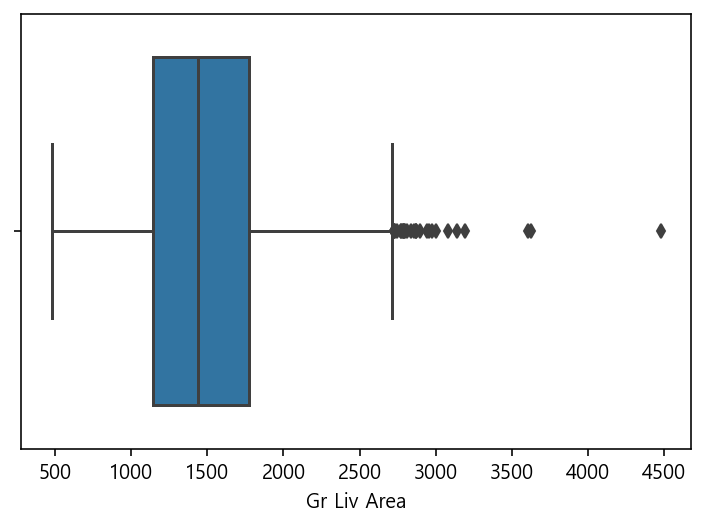

In [30]:
sns.boxplot(train['Gr Liv Area'])

<AxesSubplot:xlabel='Garage Cars'>

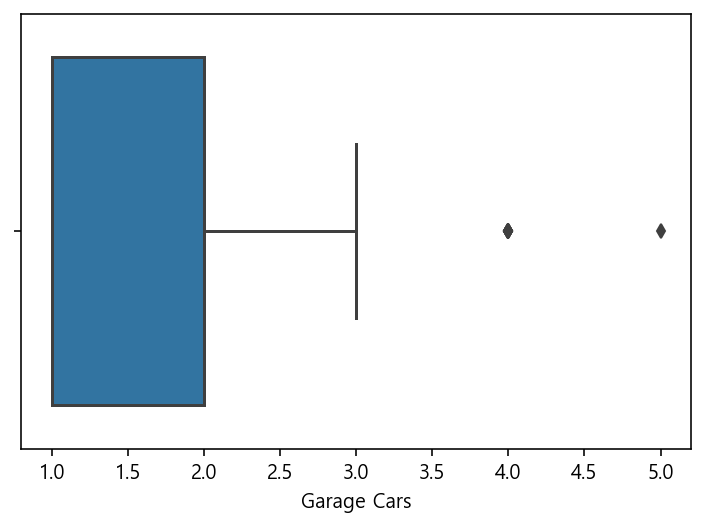

In [33]:
sns.boxplot(train['Garage Cars'])

<AxesSubplot:xlabel='Garage Area'>

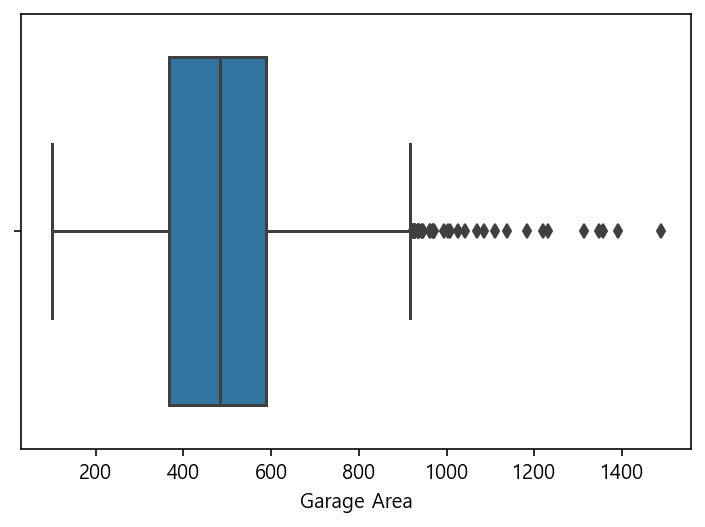

In [34]:
sns.boxplot(train['Garage Area'])

<AxesSubplot:xlabel='1st Flr SF'>

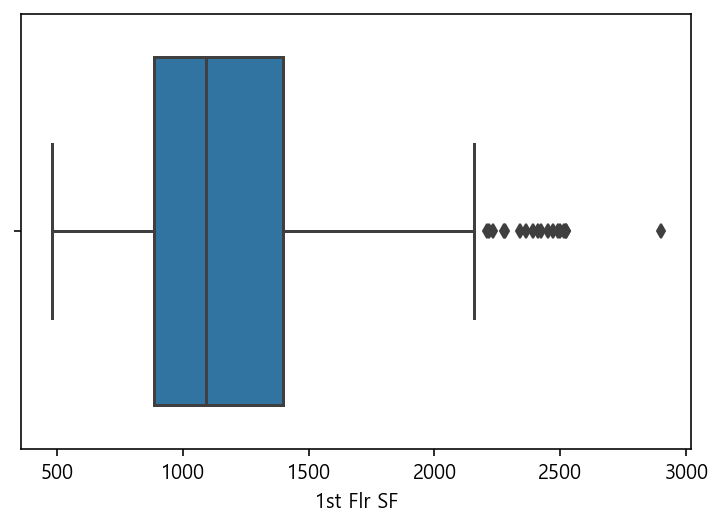

In [50]:
sns.boxplot(train['1st Flr SF'])

In [46]:
import matplotlib.pyplot as plt
import numpy as np
 
from scipy.stats import t
from scipy.stats import probplot

for df in train:
    if train[df].dtype !='object':
        print(df,': ',grubbs_test(train[df]))

        

id :  (1.7292368440768933, 4.112107736441742)
Overall Qual :  (3.1437193697000576, 4.112107736441742)
Gr Liv Area :  (853, 2061, 6.086597280595511, 4.112107736441742)
Garage Cars :  (1005, 2, 4.813901301544514, 4.112107736441742)
Garage Area :  (1158, 462, 5.15645034414268, 4.112107736441742)
Total Bsmt SF :  (4.104097853248065, 4.112107736441742)
1st Flr SF :  (1093, 1097, 4.60891340156277, 4.112107736441742)
Full Bath :  (733, 1, 4.4196604489355265, 4.112107736441742)
Year Built :  (3.0521798937448, 4.112107736441742)
Year Remod/Add :  (1.7412529943813595, 4.112107736441742)
Garage Yr Blt :  (3.1971313472348823, 4.112107736441742)
target :  (853, 260000, 7.1179721523957245, 4.112107736441742)


In [47]:
for df in test:
    if test[df].dtype !='object':
        print(df,': ',grubbs_test(test[df]))

id :  (1.7346520169543047, 4.11228633071646)
Overall Qual :  (3.096450305794325, 4.11228633071646)
Gr Liv Area :  (170, 5642, 8.054106655743068, 4.11228633071646)
Garage Cars :  (3.2684642821656498, 4.11228633071646)
Garage Area :  (170, 1418, 4.935938725700448, 4.11228633071646)
Total Bsmt SF :  (170, 6110, 11.612474673073667, 4.11228633071646)
1st Flr SF :  (906, 5095, 9.628378125798303, 4.11228633071646)
Full Bath :  (917, 4, 4.3853032456530725, 4.11228633071646)
Year Built :  (2.8435185663732114, 4.11228633071646)
Year Remod/Add :  (1.6969879235642908, 4.11228633071646)
Garage Yr Blt :  (3.0708309217912086, 4.11228633071646)


In [16]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx


In [18]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=train, column='Year Built' ,weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)

In [19]:
outlier_idx = get_outlier(df=test, column='Year Built' ,weight=1.5)
test.drop(outlier_idx, axis=0, inplace=True)

In [20]:
outlier_idx = get_outlier(df=train, column='Garage Yr Blt' ,weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)

In [21]:
outlier_idx = get_outlier(df=test, column='Garage Yr Blt' ,weight=1.5)
test.drop(outlier_idx, axis=0, inplace=True)